### 1. Implementing the intensity transformation

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

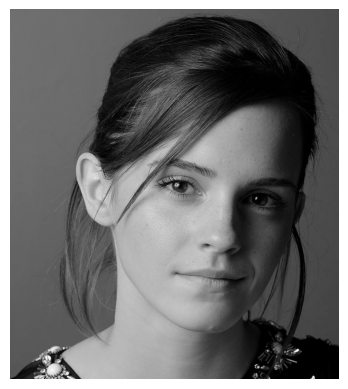

In [30]:
emma = cv2.imread('emma.jpg')
emma_grayscale=cv2.cvtColor(emma,cv2.COLOR_BGR2GRAY)

plt.imshow(emma_grayscale, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

In [32]:
# Define piecewise transformation function
t1 = np.linspace(0,   50,  num=51,  dtype=np.uint8)   
t2 = np.linspace(100, 255, num=100, dtype=np.uint8)   
t3 = np.linspace(150, 255, num=105, dtype=np.uint8)

# Concatenate all segments to create the transformation array
transform = np.concatenate((t1, t2, t3))

plt.figure(figsize=(5,5))
plt.plot(np.arange(256), transform)
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")
plt.xlim(0,255); plt.ylim(0,255); plt.grid(True)
plt.title("Piecewise LUT (3 Segments)")
plt.show()

In [33]:
# generating the transformed image
emma_transformed = cv2.LUT(emma_grayscale, transform)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot original image
axes[0].imshow(emma_grayscale, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original')
axes[0].axis("off")

# Plot transformed image
axes[1].imshow(emma_transformed, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Transformed')
axes[1].axis("off")


plt.tight_layout()
plt.show()

### Show the intensity transformations as a plots for the brain proton density image

In [35]:
brain=cv2.imread('brain_proton_density_slice.png')
brain_gray=cv2.cvtColor(brain,cv2.COLOR_BGR2GRAY)

plt.imshow(brain_gray, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

In brain MRIs: 

    ** White matter is brighter (high intensity range) **

    ** Gray matter is mid-intensity range **

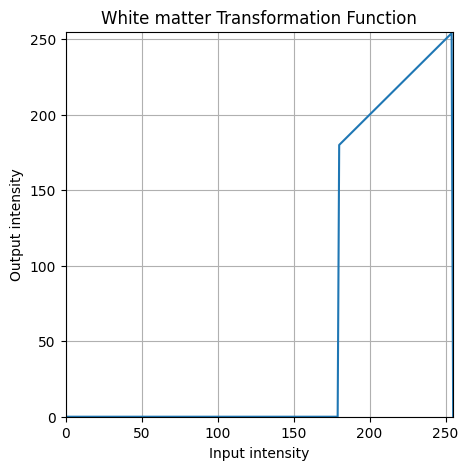

In [45]:
white_matter_start=180

t1=np.zeros(white_matter_start,dtype='uint8')
t2=np.linspace(180,256,num=76,dtype='uint8')

white_matter=np.concatenate((t1,t2))

plt.figure(figsize=(5,5))
plt.plot(np.arange(256), white_matter)
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")
plt.xlim(0,255); plt.ylim(0,255); plt.grid(True)
plt.title("White matter Transformation Function")
plt.show()

### White Matter

In [65]:
# generating the transformed image
brain_whiteMatter = cv2.LUT(brain_gray, white_matter)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot original image
axes[0].imshow(brain_gray, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original')
axes[0].axis("off")

# Plot transformed image
axes[1].imshow(brain_whiteMatter, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('white matter')
axes[1].axis("off")


plt.tight_layout()
plt.show()

### Gray Matter

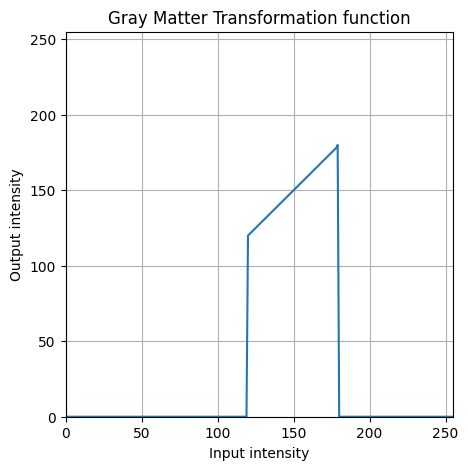

In [61]:
gray_matter_start=120
gray_matter_end=180


t1=np.zeros(120)
t2=np.linspace(gray_matter_start,gray_matter_end,num=60,dtype='uint8')
t3=np.zeros(76)

gray_matter=np.concatenate((t1,t2,t3))
gray_matter.shape


plt.figure(figsize=(5,5))
plt.plot(np.arange(256), gray_matter)
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")
plt.xlim(0,255); plt.ylim(0,255); plt.grid(True)
plt.title("Gray Matter Transformation function")
plt.show()

In [64]:
# generating the transformed image
brain_graymatter = cv2.LUT(brain_gray, gray_matter)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot original image
axes[0].imshow(brain_gray, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original')
axes[0].axis("off")

# Plot transformed image
axes[1].imshow(brain_graymatter, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('gray matter')
axes[1].axis("off")


plt.tight_layout()
plt.show()

### gamma correction

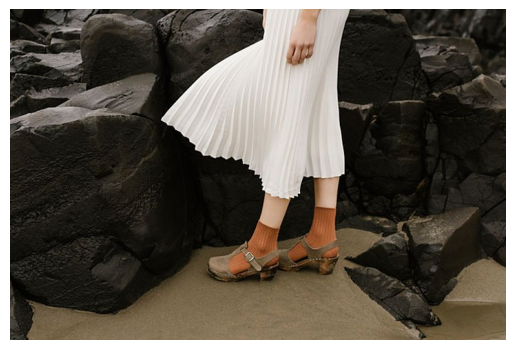

In [118]:
gamma_image = cv2.imread('highlights_and_shadows.jpg')

#converting to RGB colorspace
gamma_image_RGB=cv2.cvtColor(gamma_image,cv2.COLOR_BGR2RGB)

#converting to L∗a∗b∗ color space
gamma_lab= cv2.cvtColor(gamma_image, cv2.COLOR_BGR2Lab)
L,a,b=cv2.split(gamma_lab)

plt.imshow(gamma_image_RGB)
plt.axis('off')
plt.show()

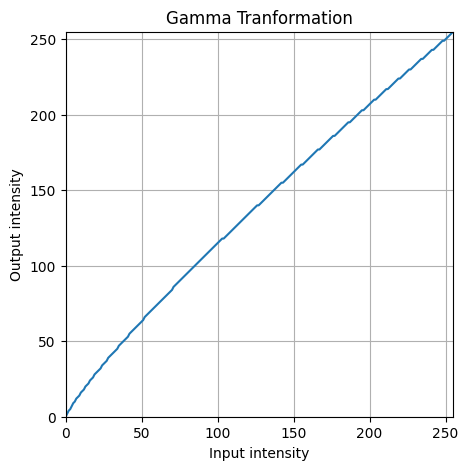

In [119]:
gamma = 0.85
t = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0, 256)],dtype='uint8')

plt.figure(figsize=(5,5))
plt.plot(np.arange(256), t)
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")
plt.xlim(0,255); plt.ylim(0,255); plt.grid(True)
plt.title("Gamma Tranformation")
plt.show()

In [120]:
ModifiedL = cv2.LUT(L, t)

# Merge the channels
gamma_merged = cv2.merge([ModifiedL, a, b])

gamma_modified = cv2.cvtColor(gamma_merged, cv2.COLOR_LAB2RGB)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot original image
axes[0].imshow(gamma_image_RGB)
axes[0].set_title('Original')
axes[0].axis("off")

# Plot transformed image
axes[1].imshow(gamma_modified)
axes[1].set_title(f'gamma transformation {gamma}')
axes[1].axis("off")


plt.tight_layout()
plt.show()

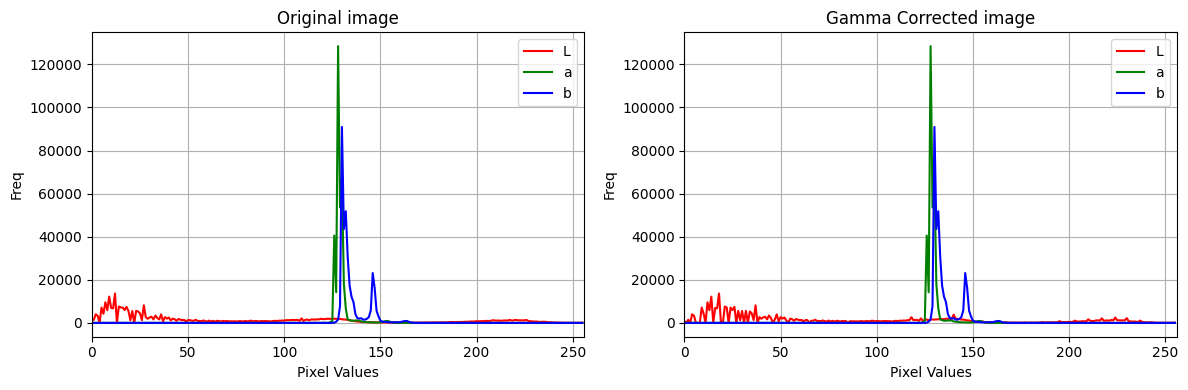

In [124]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))

LAB_names = ('L', 'a', 'b')
plot_colors = ('r', 'g', 'b')  


for i, (name, color) in enumerate(zip(LAB_names, plot_colors)):
    # Original
    hist_orig = cv2.calcHist([gamma_lab], [i], None, [256], [0, 256])
    ax[0].plot(hist_orig, color=color, label=name)

    # Corrected
    hist_gamma = cv2.calcHist([gamma_merged], [i], None, [256], [0, 256])
    ax[1].plot(hist_gamma, color=color, label=name)


for a, title in zip(ax, ('Original image', 'Gamma Corrected image')):
    a.set_title(title)
    a.set_xlabel('Pixel Values')
    a.set_ylabel('Freq')
    a.set_xlim(0, 256)
    a.grid(True)
    a.legend()

plt.tight_layout()
plt.show()


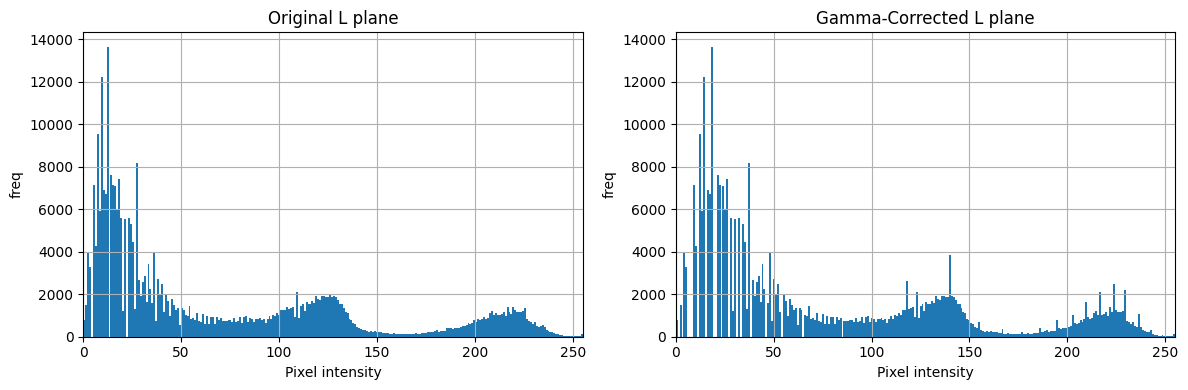

In [123]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Original L
ax[0].hist(L.ravel(), bins=256, range=(0, 255))
ax[0].set_title('Original L plane')
ax[0].set_xlabel('Pixel intensity')
ax[0].set_ylabel('freq')
ax[0].set_xlim(0, 255)
ax[0].grid(True)

# Corrected L
ax[1].hist(ModifiedL.ravel(), bins=256, range=(0, 255))
ax[1].set_title('Gamma-Corrected L plane')
ax[1].set_xlabel('Pixel intensity')
ax[1].set_ylabel('freq')
ax[1].set_xlim(0, 255)
ax[1].grid(True)

plt.tight_layout()
plt.show()


### Increasing the vibrance of a photograph

In [140]:
# Import Emma image
spiderman = cv2.imread('spider.png')


spiderman_HSV = cv2.cvtColor(spiderman, cv2.COLOR_BGR2HSV)
spiderman_RGB = cv2.cvtColor(spiderman, cv2.COLOR_BGR2RGB)

# Split into planes
H, S, V = cv2.split(spiderman_HSV)

fig, axs = plt.subplots(1, 2, figsize=(12, 8))


axs[0].imshow(spiderman_RGB)
axs[0].set_title('Original')
axs[0].axis('off')  


axs[1].imshow(spiderman_HSV)
axs[1].set_title('HSV Image')
axs[1].axis('off')  

# Show the plot
plt.tight_layout()
plt.show()

In [150]:
a=0.7
def vibrance(a=a, mu=128.0, sigma=70.0):
    
    x = np.arange(256, dtype=np.float32)
    bump = a * 128.0 * np.exp(-((x - mu) ** 2) / (2.0 * (sigma ** 2)))
    f = x + bump
    f = np.clip(f, 0, 255).astype(np.uint8)
    return x, f


In [151]:
# Build LUT
x, transformation = vibrance()

# Plot
plt.figure(figsize=(5,5))
plt.plot(x, f)
plt.title('Intensity Transformation f(x)')
plt.xlabel('Input Intensity (x)')
plt.ylabel('Output Intensity (f(x))')
plt.grid(True)
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.tight_layout()
plt.show()


In [152]:
# Apply transformation to Saturation plane
S_modified = cv2.LUT(S, transformation)

# Merge
merged = cv2.merge([H, S_modified, V])
spider_modified = cv2.cvtColor(merged, cv2.COLOR_HSV2RGB)

In [153]:
# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# Plot the first image
axs[0].imshow(spiderman_RGB)
axs[0].set_title('Original')
axs[0].axis('off')  # Turn off the axis

# Plot the second image
axs[1].imshow(spider_modified)
axs[1].set_title(f'Vibrance adjusted {a}')
axs[1].axis('off')  # Turn off the axis

# Show the plot
plt.tight_layout()
plt.show()

### Question5

In [176]:
shells = cv2.imread('shells.tif')
shells_GRAY=cv2.cvtColor(shells,cv2.COLOR_BGR2GRAY)
shells_RGB=cv2.cvtColor(shells,cv2.COLOR_BGR2RGB)
shells_HSV=cv2.cvtColor(shells,cv2.COLOR_BGR2HSV)
H,S,V=cv2.split(shells_HSV)


def my_histogram_equalization(img_gray: np.ndarray) -> np.ndarray:
    # Manual hist-eq for uint8 grayscale
    flat = img_gray.ravel()
    hist = np.bincount(flat, minlength=256)
    cdf  = np.cumsum(hist).astype(np.float64)
    cdf /= cdf[-1]                    # normalize to [0,1]
    lut  = np.round(cdf * 255).astype(np.uint8)
    return lut[flat].reshape(img_gray.shape)


V_eq = my_histogram_equalization(V)
hsv_eq = cv2.merge([H, S, V_eq])
rgb_eq_hsv = cv2.cvtColor(hsv_eq, cv2.COLOR_HSV2RGB)


fig, ax = plt.subplots(2, 2, figsize=(14, 8))

# Images
ax[0,0].imshow(shells_RGB)
ax[0,0].set_title('Original')     
ax[0,0].axis('off')


ax[0,1].imshow(rgb_eq_hsv)
ax[0,1].set_title('Equalized (HSV)')
ax[0,1].axis('off')

# Histograms(HSV)
ax[1,1].hist(V_eq.ravel(), bins=256, range=(0,255), alpha=0.5, label='V equalized',color='black')
ax[1,1].set_title('Equalized Histogram')
ax[1,1].set_xlabel('Intensity (0–255)'); ax[1,1].set_ylabel('Count'); ax[1,1].grid(True); ax[1,1].legend()

#original grayscale histogram for reference
ax[1,0].hist(shells_GRAY.ravel(), bins=256, range=(0,255), color='black')
ax[1,0].set_title('Original Grayscale Histogram')
ax[1,0].set_xlabel('Intensity (0–255)'); ax[1,0].set_ylabel('Count'); ax[1,0].grid(True)

plt.tight_layout()
plt.show()


###  histogram equalization only to the foreground of an image

In [177]:
jeniffer = cv2.imread('jeniffer.jpg')
jeniffer_RGB = cv2.cvtColor(jeniffer, cv2.COLOR_BGR2RGB)

jeniffer_HSV = cv2.cvtColor(jeniffer, cv2.COLOR_BGR2HSV)       # Convert the image into HSV color space
h_channel, s_channel, v_channel = cv2.split(jeniffer_HSV)     # Split the converted image into hue, saturation and value planes

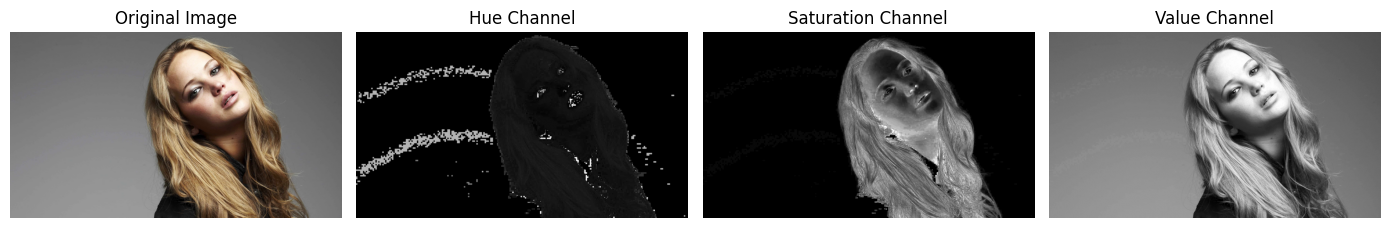

In [178]:
#region
plt.figure(figsize=(14, 6))

plt.subplot(141)
plt.imshow(jeniffer_RGB, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Displaying each separate plane in gray scale
plt.subplot(142)
plt.imshow(h_channel, cmap='gray')
plt.title('Hue Channel')
plt.axis('off')

plt.subplot(143)
plt.imshow(s_channel, cmap='gray')
plt.title('Saturation Channel')
plt.axis('off')

plt.subplot(144)
plt.imshow(v_channel, cmap='gray')
plt.title('Value Channel')
plt.axis('off')

plt.tight_layout()
plt.show()
#endregion

In [ ]:


def otsu_mask(channel):
    
    ch = cv2.GaussianBlur(channel, (5,5), 0)
    _, m = cv2.threshold(ch, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    # make sure foreground is white (invert if mostly black)
    if np.mean(m) < 127: 
        m = cv2.bitwise_not(m)
    
    # quick clean-up
    k = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
    m = cv2.morphologyEx(m, cv2.MORPH_OPEN, k, iterations=1)
    return m

mask_h = otsu_mask(h_channel)
mask_s = otsu_mask(s_channel)
mask_v = otsu_mask(v_channel)


plt.figure(figsize=(14,4))
plt.subplot(1,3,1); plt.imshow(mask_h, cmap='gray'); plt.title('Foreground Mask from Hue Plane'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(mask_s, cmap='gray'); plt.title('Foreground Mask from Saturation Plane'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(mask_v, cmap='gray'); plt.title('Foreground Mask from Value Plane'); plt.axis('off')
plt.tight_layout(); plt.show()



NameError: name 'cv' is not defined